In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [9]:
df = yf.Ticker("AAPL")
df = df.history(period="max")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099584,0.100017,0.099584,0.099584,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094821,0.094821,0.094388,0.094388,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087893,0.087893,0.087461,0.087461,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089625,0.090058,0.089625,0.089625,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.092224,0.092657,0.092224,0.092224,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2023-07-27 00:00:00-04:00,196.020004,197.199997,192.550003,193.220001,47460200,0.0,0.0
2023-07-28 00:00:00-04:00,194.669998,196.630005,194.139999,195.830002,48291400,0.0,0.0
2023-07-31 00:00:00-04:00,196.059998,196.490005,195.259995,196.449997,38824100,0.0,0.0


In [10]:
df = df.reset_index()
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12 00:00:00-05:00,0.099584,0.100017,0.099584,0.099584,469033600,0.0,0.0
1,1980-12-15 00:00:00-05:00,0.094821,0.094821,0.094388,0.094388,175884800,0.0,0.0
2,1980-12-16 00:00:00-05:00,0.087893,0.087893,0.087461,0.087461,105728000,0.0,0.0
3,1980-12-17 00:00:00-05:00,0.089625,0.090058,0.089625,0.089625,86441600,0.0,0.0
4,1980-12-18 00:00:00-05:00,0.092224,0.092657,0.092224,0.092224,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...
10744,2023-07-27 00:00:00-04:00,196.020004,197.199997,192.550003,193.220001,47460200,0.0,0.0
10745,2023-07-28 00:00:00-04:00,194.669998,196.630005,194.139999,195.830002,48291400,0.0,0.0
10746,2023-07-31 00:00:00-04:00,196.059998,196.490005,195.259995,196.449997,38824100,0.0,0.0
10747,2023-08-01 00:00:00-04:00,196.240005,196.729996,195.279999,195.610001,35175100,0.0,0.0


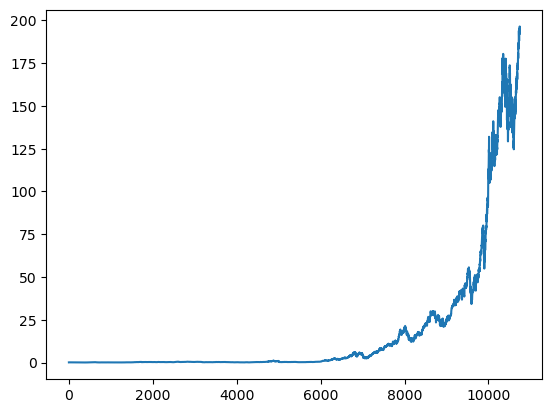

In [11]:
plt.plot(df.Close)

In [12]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
10744    173.706426
10745    174.128551
10746    174.579144
10747    175.008656
10748    175.430636
Name: Close, Length: 10749, dtype: float64

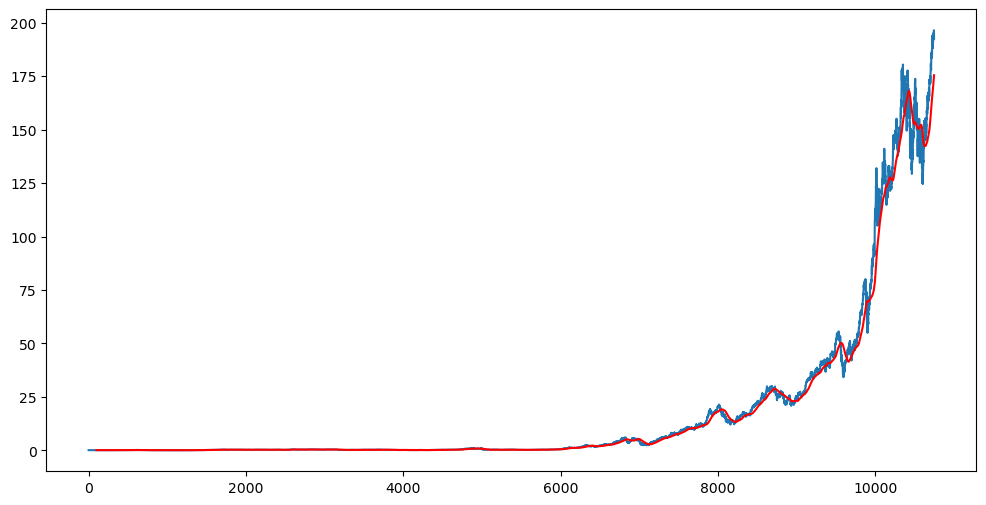

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [14]:
ma200 = df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
10744    158.185617
10745    158.465865
10746    158.756380
10747    159.045881
10748    159.297087
Name: Close, Length: 10749, dtype: float64

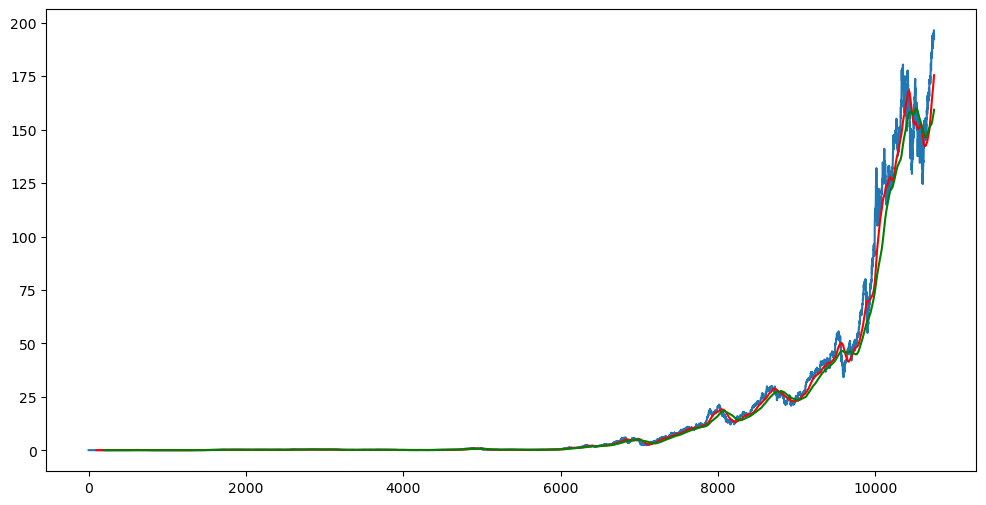

In [15]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [16]:
df.shape

(10749, 8)

In [17]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
data_testing.shape

(7524, 1)


(3225, 1)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [19]:
data_train = scaler.fit_transform(data_training)
data_train

array([[0.0069587 ],
       [0.00637068],
       [0.00558656],
       ...,
       [0.98838769],
       [0.98924635],
       [0.98934954]])

In [20]:
x_train = []
y_train = []

for i in range(100, data_train.shape[0]):
    x_train.append(data_train[i-100:i])
    y_train.append(data_train[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [24]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
232/232 [==============================] - 36s 147ms/step - loss: 0.0047
Epoch 2/50
232/232 [==============================] - 35s 149ms/step - loss: 0.0020
Epoch 3/50
232/232 [==============================] - 34s 148ms/step - loss: 0.0017
Epoch 4/50
232/232 [==============================] - 33s 144ms/step - loss: 0.0017
Epoch 5/50
232/232 [==============================] - 34s 145ms/step - loss: 0.0016
Epoch 6/50
232/232 [==============================] - 33s 143ms/step - loss: 0.0015
Epoch 7/50
232/232 [==============================] - 34s 148ms/step - loss: 0.0013
Epoch 8/50
232/232 [==============================] - 34s 147ms/step - loss: 0.0013
Epoch 9/50
232/232 [==============================] - 34s 147ms/step - loss: 0.0012
Epoch 10/50
232/232 [==============================] - 34s 148ms/step - loss: 0.0014
Epoch 11/50
232/232 [==============================] - 34s 148ms/step - loss: 0.0012
Epoch 12/50
232/232 [==============================] - 34s 148ms/step - lo

In [28]:
model.save('my_model.keras')

In [29]:
data_testing.head()

,Close
7524,8.926522
7525,8.965682
7526,9.062213
7527,9.110780
7528,9.176650


In [30]:
past_100 = data_training.tail(100)

In [32]:
final_df = past_100.append(data_testing, ignore_index=True)

/var/folders/yg/hhy0k66n2snd1r8nq72sjk5r0000gn/T/ipykernel_49578/2732967404.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100.append(data_testing, ignore_index=True)


In [33]:
final_df.head()

,Close
0,7.660413
1,7.538385
2,7.217229
3,7.355648
4,7.490425


In [34]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.002342  ],
       [0.00169715],
       [0.        ],
       ...,
       [1.        ],
       [0.99556104],
       [0.97954902]])

In [35]:
input_data.shape


(3325, 1)

In [36]:
x_test = []
y_test = []
for i in range (100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [38]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [39]:
x_test.shape


(3225, 100, 1)

In [40]:
y_test.shape


(3225,)

In [41]:
y_predicted = model.predict(x_test)

101/101 [==============================] - 4s 40ms/step


In [42]:
y_predicted.shape

(3225, 1)

In [43]:
y_predicted

array([[0.03127877],
       [0.03149948],
       [0.03171214],
       ...,
       [0.8995087 ],
       [0.9009738 ],
       [0.90253246]], dtype=float32)

In [44]:
scaler.scale_

array([0.0052845])

In [45]:
scale_factor = 1/0.0052845
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

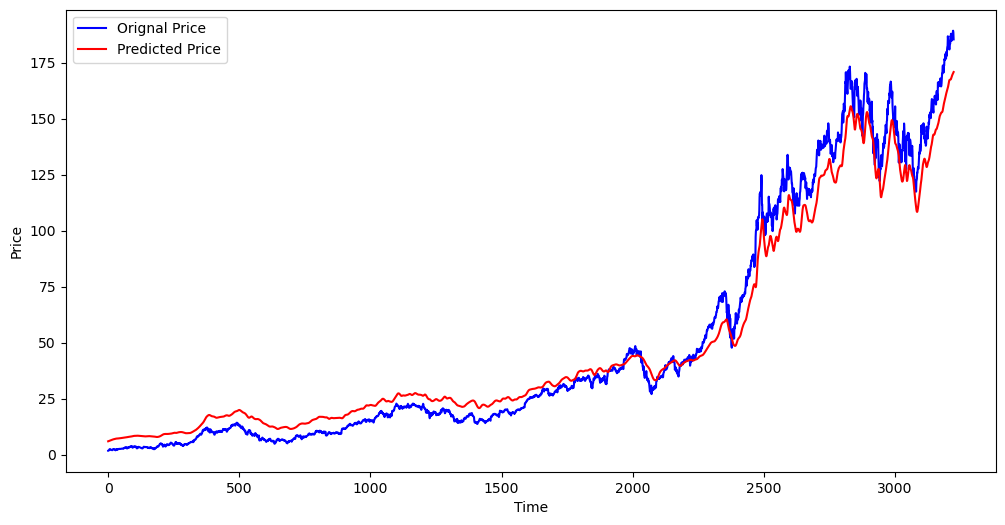

In [46]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Orignal Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()